## Name : Mahmoud Hamed 
## Task : Sales Analysis 

In [203]:
import numpy as np # linear algebra
import pandas as pd # data processing

# Data Visualisation
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [204]:
#import dataset
df=pd.read_excel("../input/superstore-salesxlsx/superstore_sales.xlsx")
df.shape

(51290, 21)

In [205]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

In [207]:
#check miss value
df.isnull().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

In [208]:
#getting descriptive statistics summary
df.describe()

,sales,quantity,discount,profit,shipping_cost,year
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,246.490581,3.476545,0.142908,28.641740,26.375818,2012.777208
std,487.565361,2.278766,0.212280,174.424113,57.296810,1.098931
min,0.444000,1.000000,0.000000,-6599.978000,0.002000,2011.000000
25%,30.758625,2.000000,0.000000,0.000000,2.610000,2012.000000
50%,85.053000,3.000000,0.000000,9.240000,7.790000,2013.000000
75%,251.053200,5.000000,0.200000,36.810000,24.450000,2014.000000
max,22638.480000,14.000000,0.850000,8399.976000,933.570000,2014.000000


## let's visualize 

In [209]:
#chose style 
sns.set_style('whitegrid') #whitegrid,darkgrid
sns.set_context("talk") #talk,poster,notebook

#add colores for plot bars
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'] 

In [210]:
df=df.drop(['order_id'], axis=1) #drop unneeded coloum

In [211]:
df['country'].value_counts() 

United States    9994
Australia        2837
France           2827
Mexico           2644
Germany          2065
                 ... 
Burundi             2
Chad                2
Eritrea             2
Bahrain             2
South Sudan         2
Name: country, Length: 147, dtype: int64

In [212]:
df['customer_name'].value_counts()

Muhammed Yedwab        108
Steven Ward            106
Patrick O'Brill        102
Bill Eplett            102
Gary Hwang             102
                      ... 
Catherine Glotzbach     35
David Bremer            34
Nicole Brennan          31
Darren Budd             31
Michael Oakman          29
Name: customer_name, Length: 795, dtype: int64

In [213]:
df['product_name'].value_counts()

Staples                                                                      227
Cardinal Index Tab, Clear                                                     92
Eldon File Cart, Single Width                                                 90
Rogers File Cart, Single Width                                                84
Ibico Index Tab, Clear                                                        83
                                                                            ... 
Xerox Blank Computer Paper                                                     1
Panasonic KX MB2061 Multifunction Printer                                      1
Grip Seal Envelopes                                                            1
Snap-A-Way Black Print Carbonless Speed Message, No Reply Area, Duplicate      1
Acco Glide Clips                                                               1
Name: product_name, Length: 3788, dtype: int64

In [214]:
df['market'].value_counts()

APAC      11002
LATAM     10294
EU        10000
US         9994
EMEA       5029
Africa     4587
Canada      384
Name: market, dtype: int64

In [215]:
df['region'].value_counts()

Central           11117
South              6645
EMEA               5029
North              4785
Africa             4587
Oceania            3487
West               3203
Southeast Asia     3129
East               2848
North Asia         2338
Central Asia       2048
Caribbean          1690
Canada              384
Name: region, dtype: int64

In [216]:
df['state'].value_counts()

California          2001
England             1499
New York            1128
Texas                985
Ile-de-France        981
                    ... 
Rize                   1
Meta                   1
Ar Raqqah              1
Pernik                 1
Atsimo-Andrefana       1
Name: state, Length: 1094, dtype: int64

Consumer       26518
Corporate      15429
Home Office     9343
Name: segment, dtype: int64

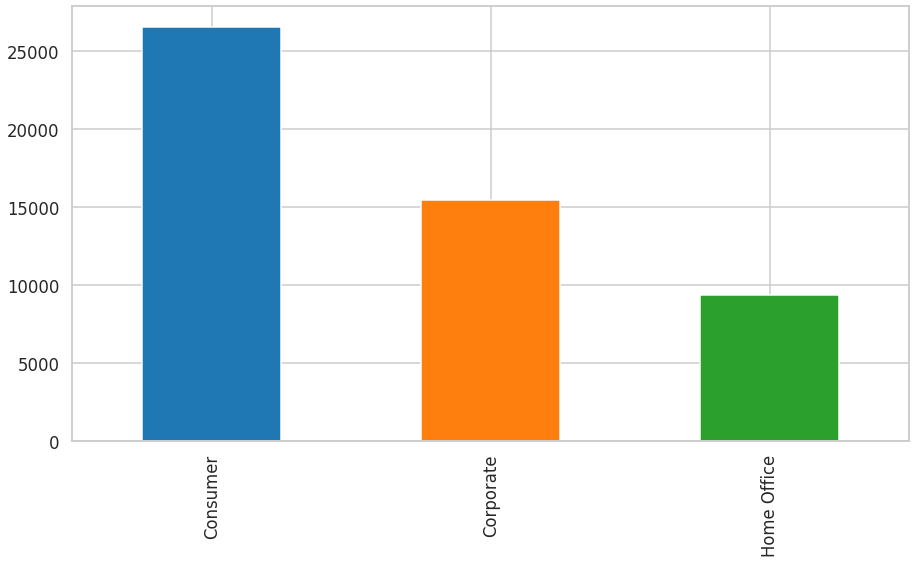

In [217]:
plt.figure(figsize = (15,8))
df.segment.value_counts(dropna=True).plot(kind='bar',color = colors);
df['segment'].value_counts()

Standard Class    30775
Second Class      10309
First Class        7505
Same Day           2701
Name: ship_mode, dtype: int64

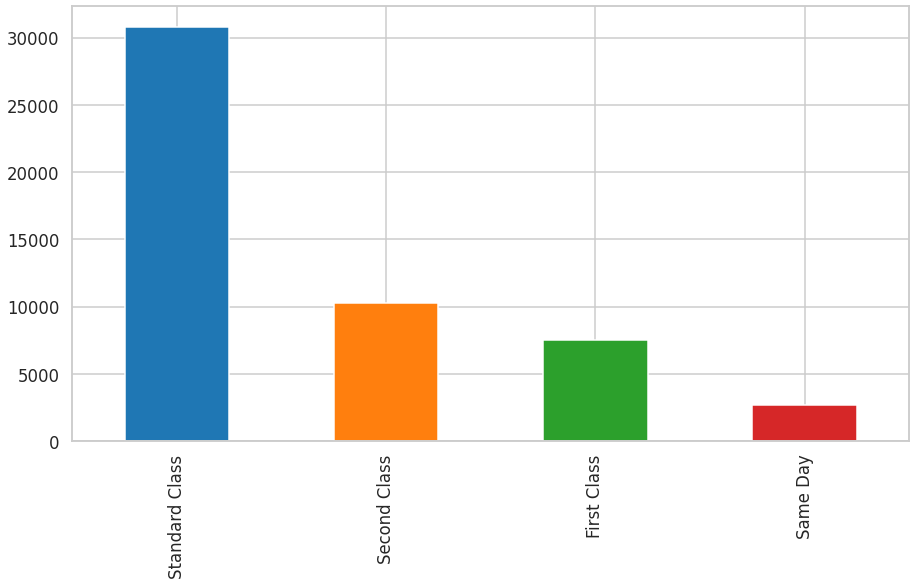

In [218]:
plt.figure(figsize = (15,8))
df.ship_mode.value_counts(dropna=True).plot(kind='bar',color = colors);
df['ship_mode'].value_counts()

Office Supplies    31273
Technology         10141
Furniture           9876
Name: category, dtype: int64

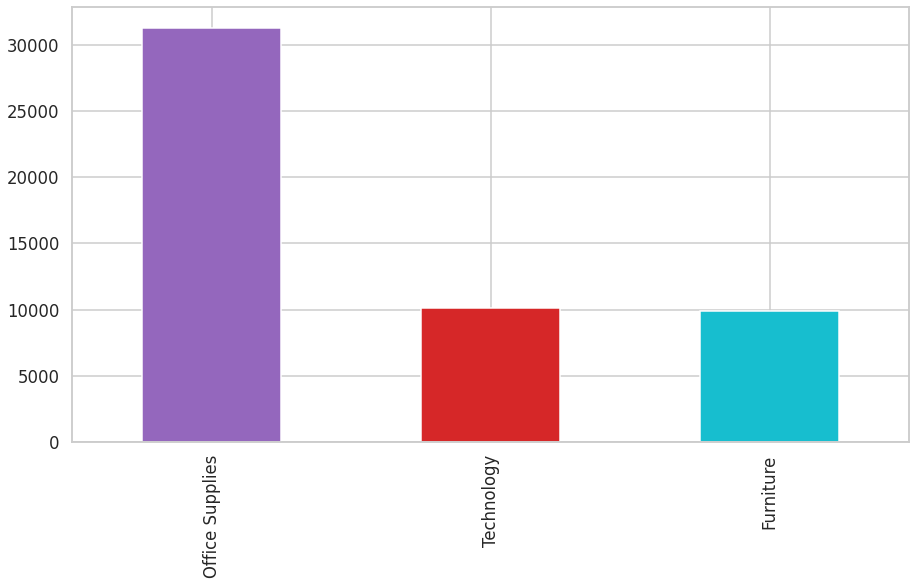

In [219]:
plt.figure(figsize = (15,8))
df.category.value_counts(dropna=True).plot(kind='bar',color = ['#9467bd', '#d62728', '#17becf']);
df['category'].value_counts()

Binders        6152
Storage        5059
Art            4883
Paper          3538
Chairs         3434
Phones         3357
Furnishings    3170
Accessories    3075
Labels         2606
Envelopes      2435
Supplies       2425
Fasteners      2420
Bookcases      2411
Copiers        2223
Appliances     1755
Machines       1486
Tables          861
Name: sub_category, dtype: int64

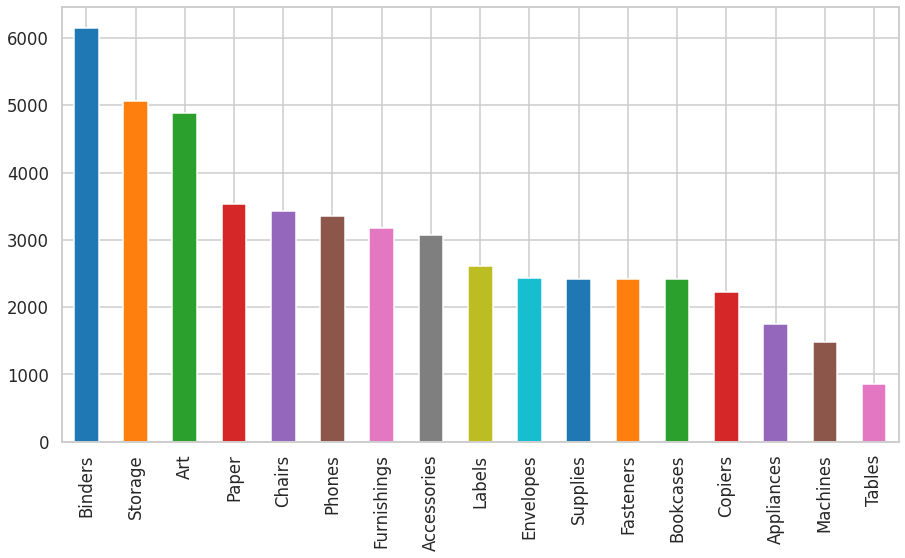

In [220]:
plt.figure(figsize = (15,8))
df.sub_category.value_counts(dropna=True).plot(kind='bar',color = colors);
df['sub_category'].value_counts()

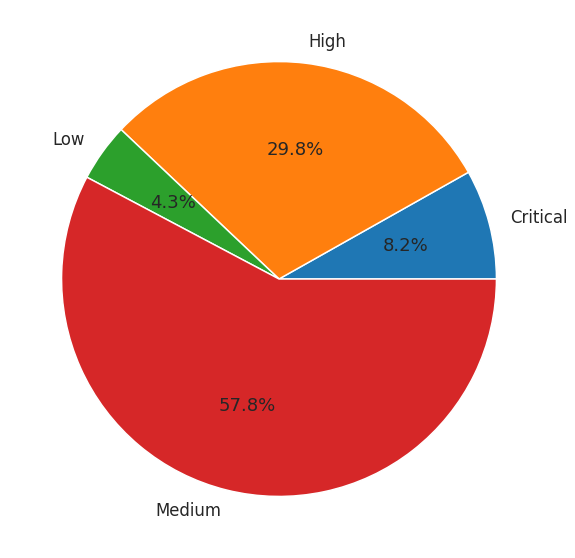

Medium      29433
High        15501
Critical     3932
Low          2424
Name: order_priority, dtype: int64

In [221]:
#order priority according to profits 
order_prio = df[df['profit'] >= 0].groupby('order_priority')['profit'].agg('sum')
plt.figure(figsize=(15,10))
plt.pie(order_prio, labels = order_prio.index.values, autopct='%1.1f%%')
plt.show()
df['order_priority'].value_counts()

2014    17531
2013    13799
2012    10962
2011     8998
Name: year, dtype: int64

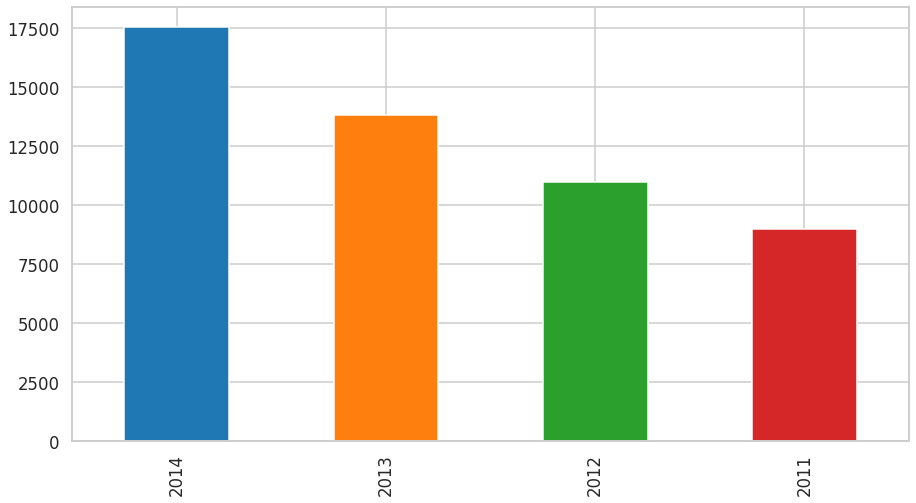

In [222]:
plt.figure(figsize = (15,8))
df.year.value_counts(dropna=True).plot(kind='bar',color = colors);
df['year'].value_counts()

<AxesSubplot:xlabel='sub_category', ylabel='Proportion'>

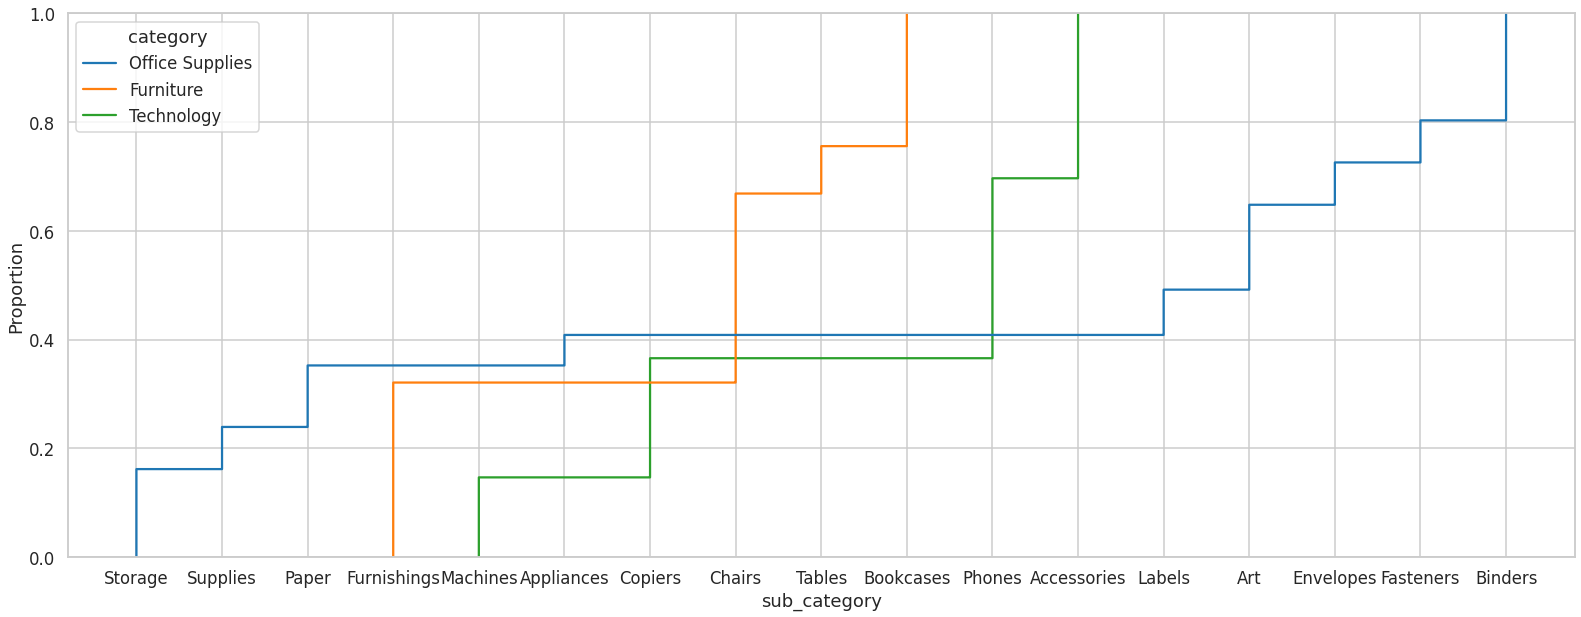

In [223]:
#ecdf to know sub category is what kind of category 
plt.figure(figsize=[27,10])
sns.ecdfplot(data=df, x="sub_category", hue="category")

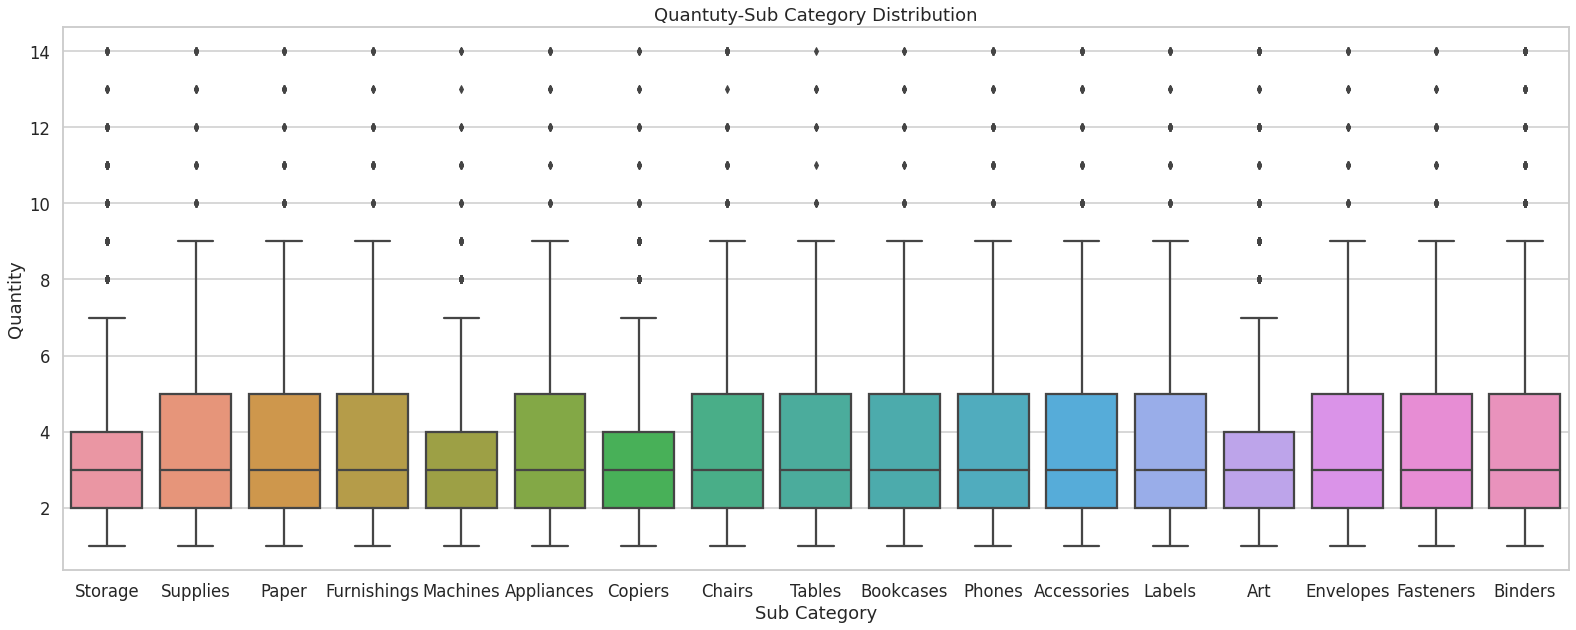

In [224]:
plt.figure(figsize=[27,10])
sns.boxplot(data=df,y='quantity',x='sub_category');
plt.xlabel('Sub Category');
plt.ylabel('Quantity');
plt.title('Quantuty-Sub Category Distribution');

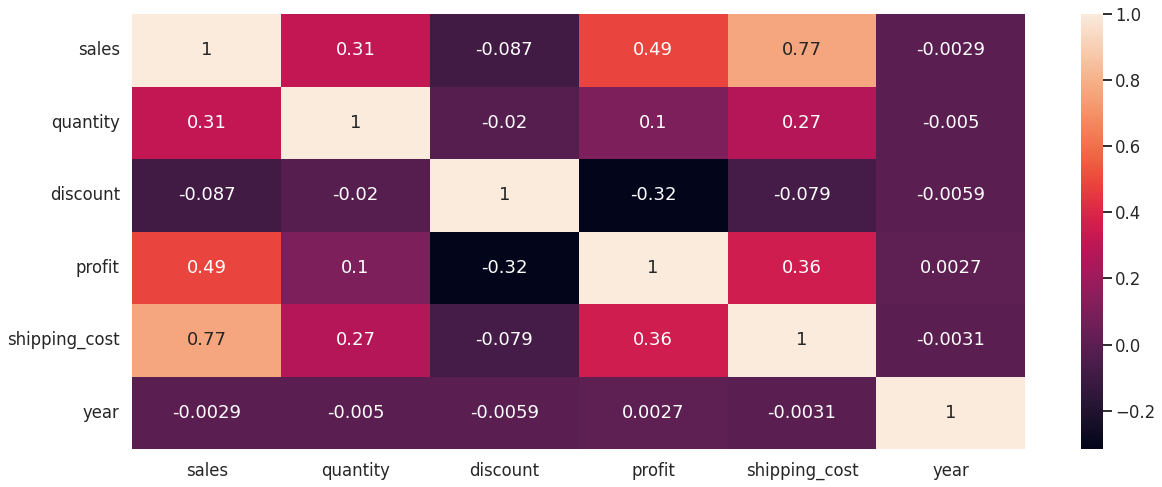

In [225]:
#correlation matrix 
plt.figure(figsize=(20, 8))
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()


<AxesSubplot:ylabel='Density'>

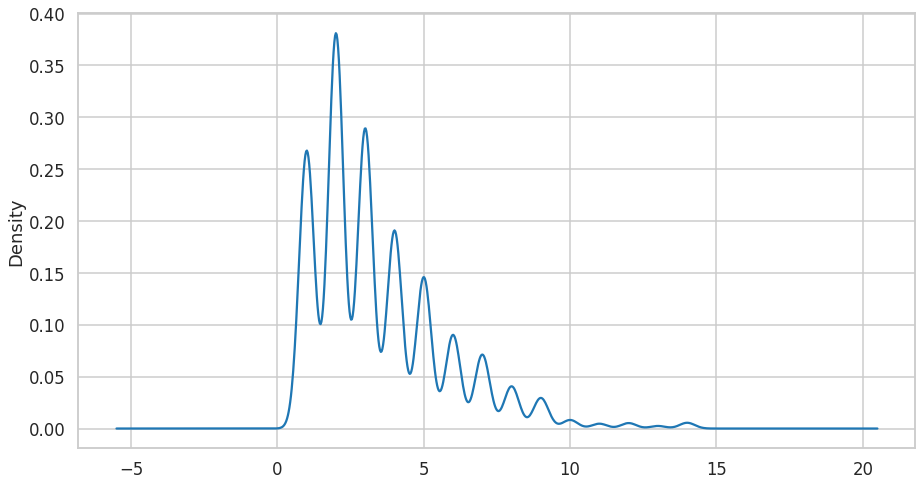

In [226]:
#probability of quantity for each order 
plt.figure(figsize = (15,8))
df['quantity'].plot(kind='density')

array([[<AxesSubplot:title={'center':'order_date'}>,
        <AxesSubplot:title={'center':'ship_date'}>,
        <AxesSubplot:title={'center':'sales'}>],
       [<AxesSubplot:title={'center':'quantity'}>,
        <AxesSubplot:title={'center':'discount'}>,
        <AxesSubplot:title={'center':'profit'}>],
       [<AxesSubplot:title={'center':'shipping_cost'}>,
        <AxesSubplot:title={'center':'year'}>, <AxesSubplot:>]],
      dtype=object)

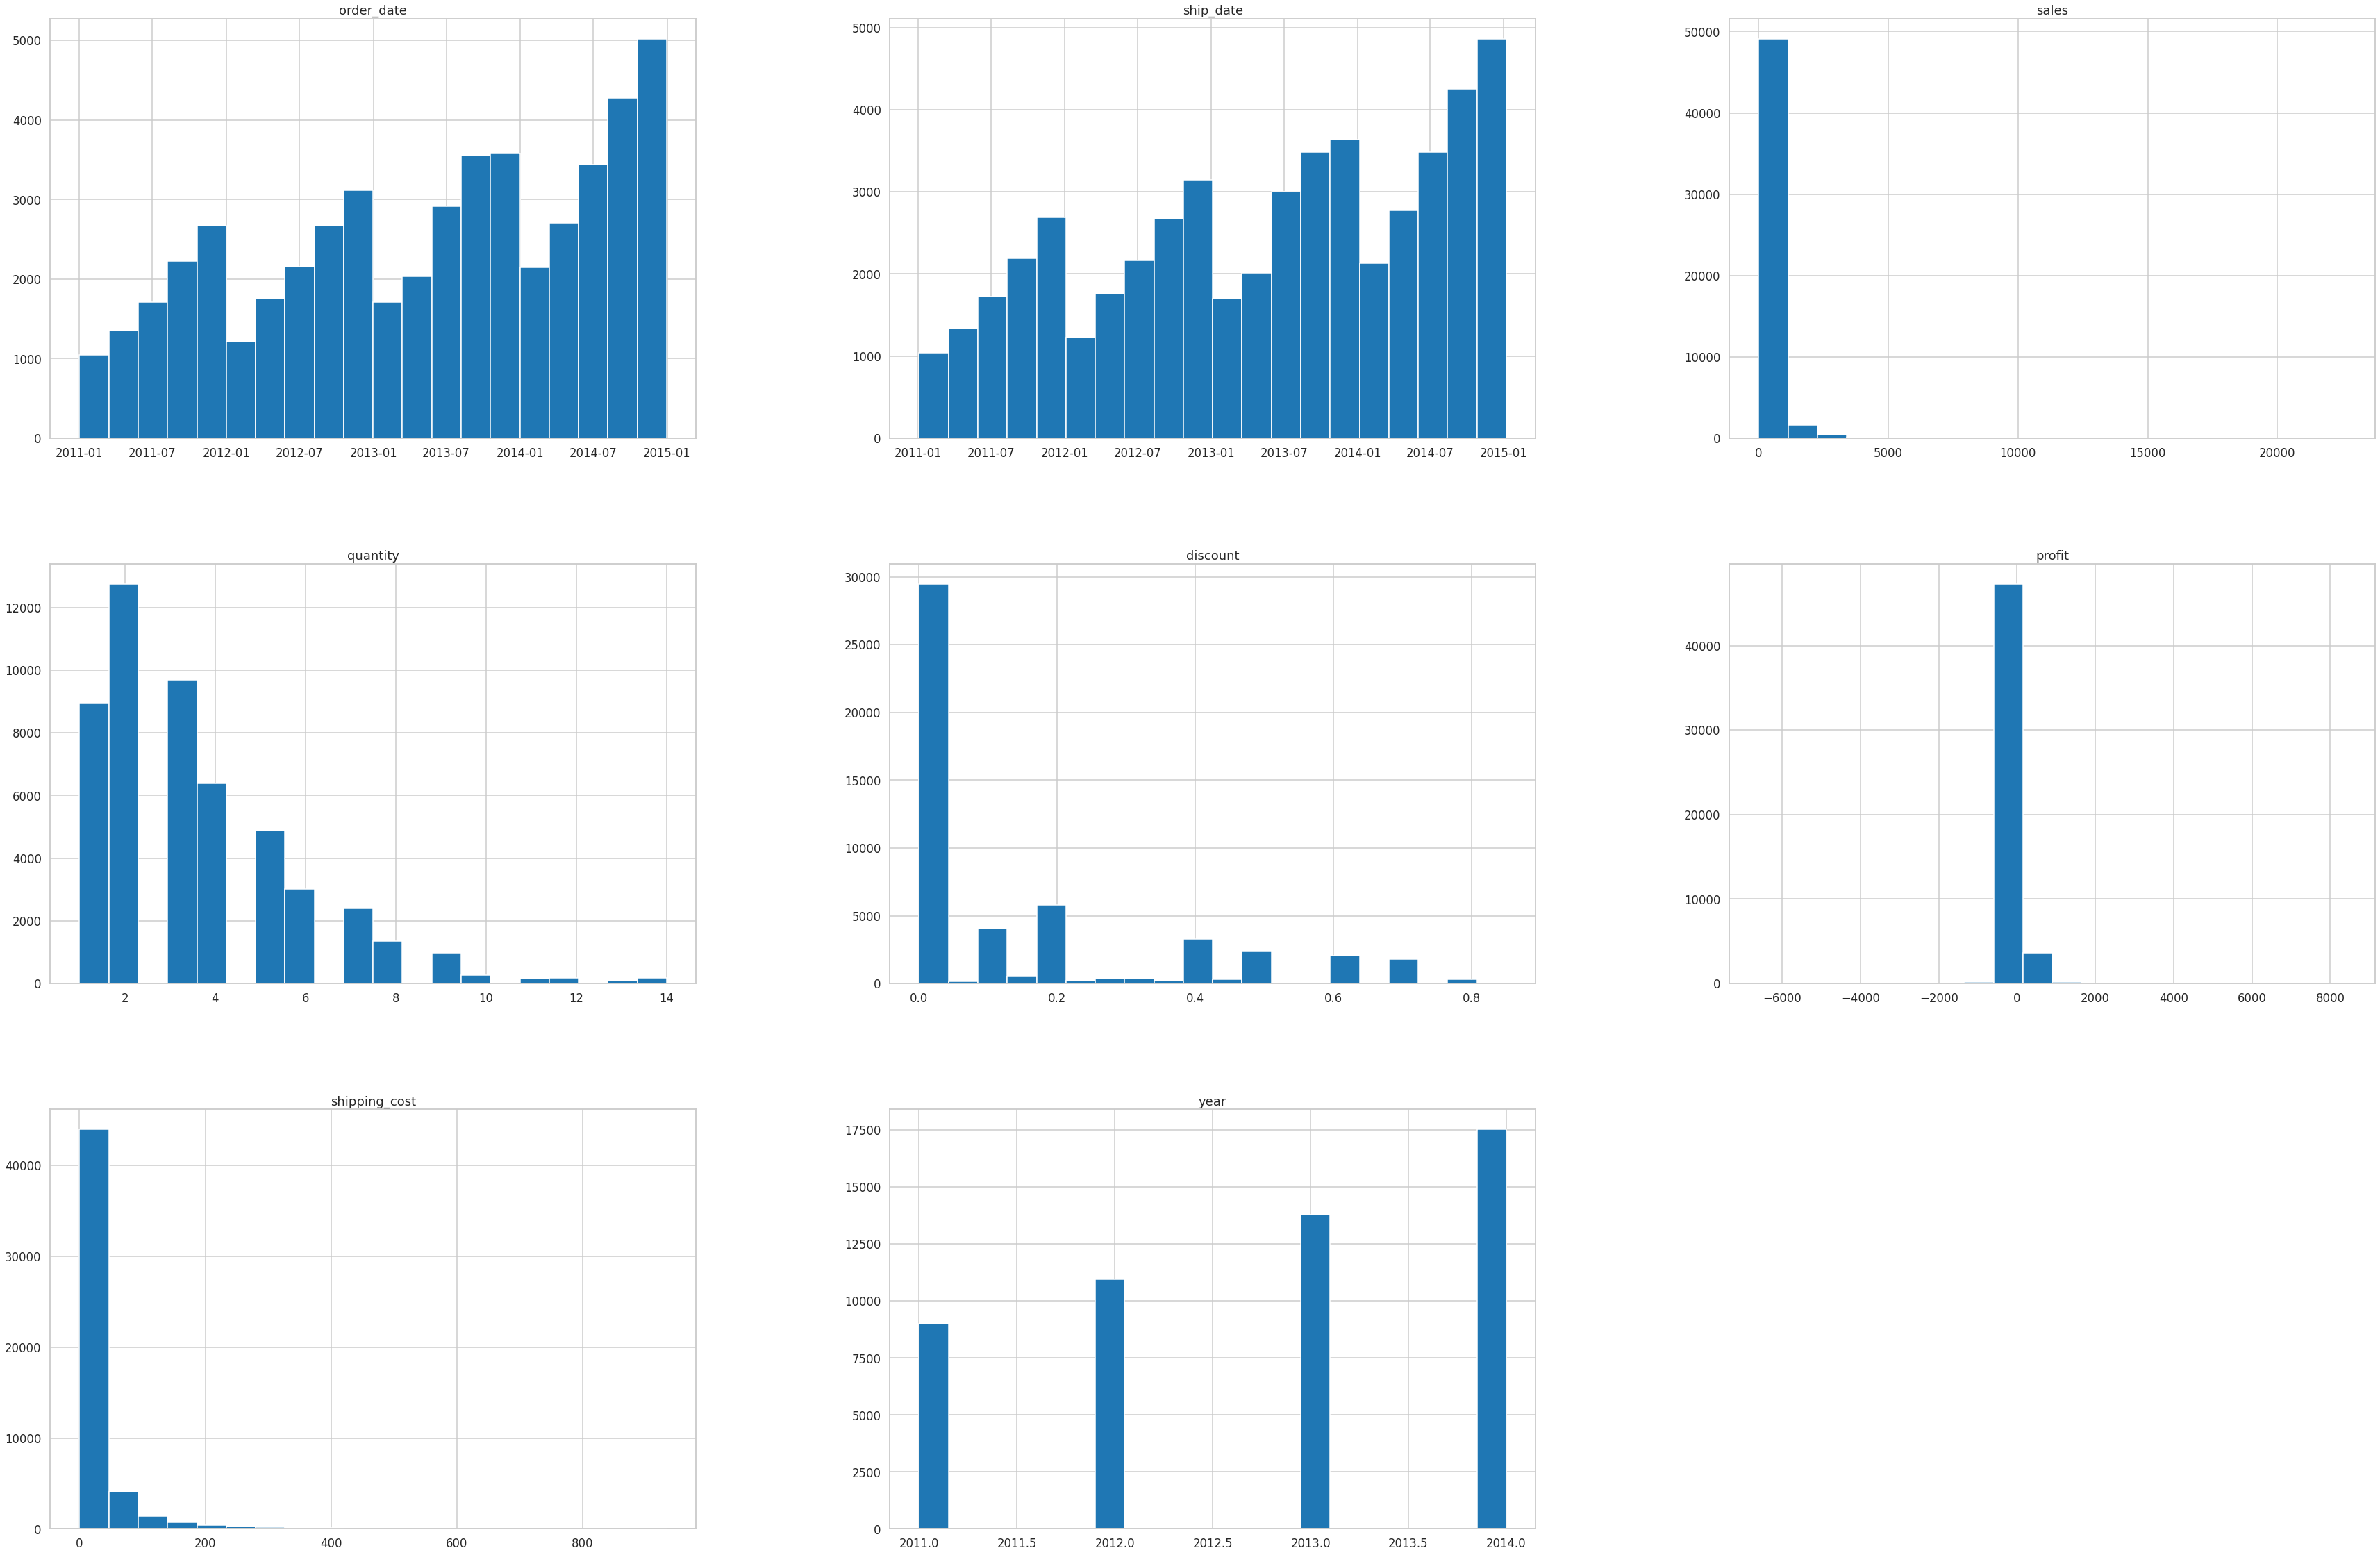

In [227]:
df.hist(bins=20, figsize=(60, 40))

## let's analyze sales and profit by monthes 


In [228]:
# Getting month year from order_date
df['month_year'] = df['order_date'].apply(lambda x: x.strftime('%Y-%m'))

In [229]:
# grouping month_year by sales
df_temp = df.groupby('month_year').sum()['sales'].reset_index()

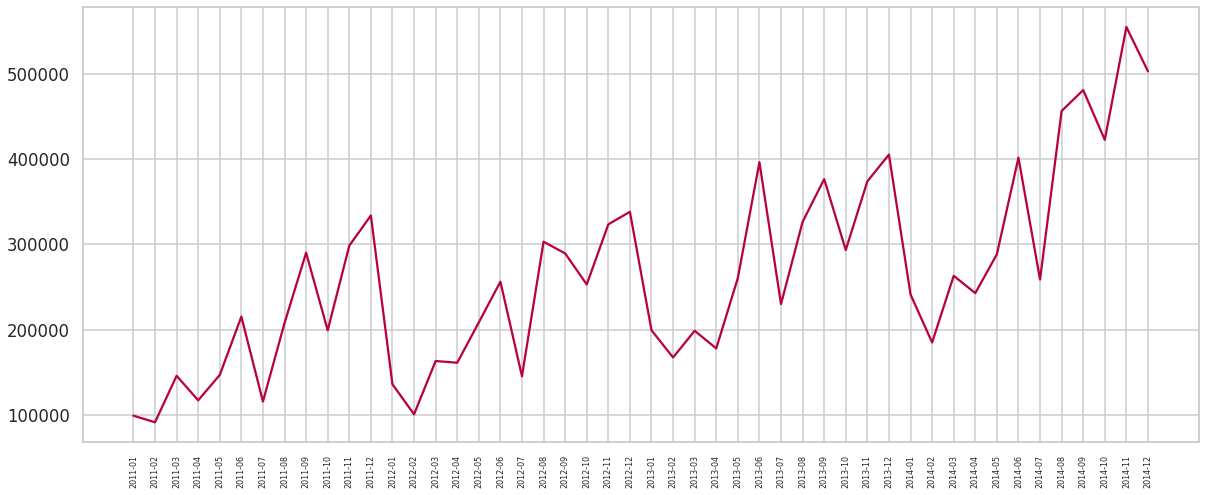

In [230]:
# Setting the figure size
plt.figure(figsize=(20, 8))
plt.plot(df_temp['month_year'], df_temp['sales'], color='#b80045')
plt.xticks(rotation='vertical', size=8)
plt.show()


In [231]:
df_profit = df.groupby('month_year').sum()['profit'].reset_index()

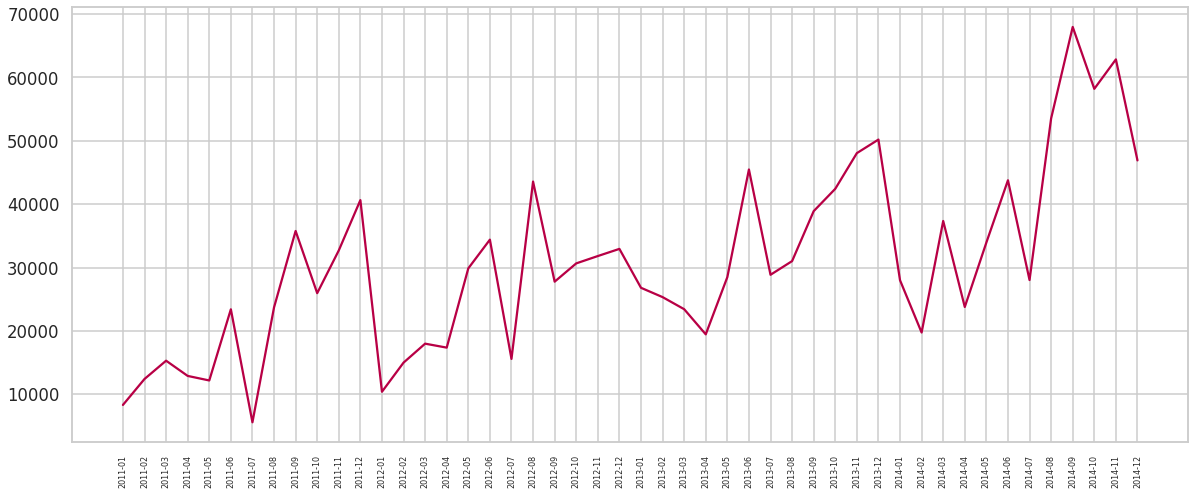

In [232]:
# Setting the figure size
plt.figure(figsize=(20, 8))
plt.plot(df_profit['month_year'], df_profit['profit'], color='#b80045')
plt.xticks(rotation='vertical', size=8)
plt.show()


0.485939404403154

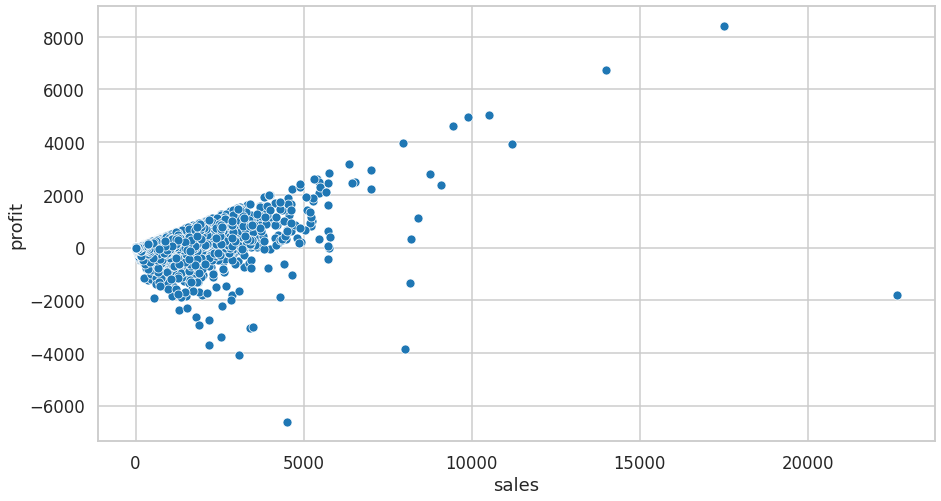

In [233]:
#realtion between profit and sales 
plt.figure(figsize=(15, 8))

sns.scatterplot(data=df, x='sales', y='profit')

df['sales'].corr(df['profit'])

0.7680728643587602

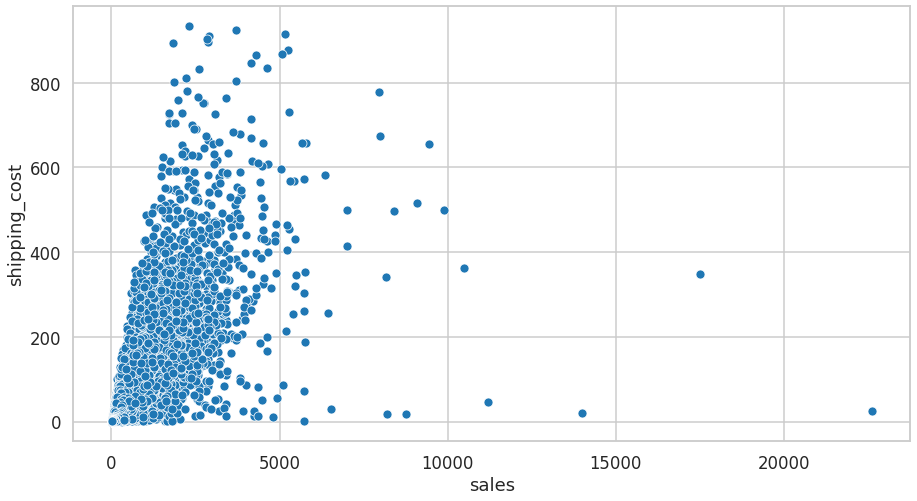

In [234]:
#realtion between profit and sales 
plt.figure(figsize=(15, 8))

sns.scatterplot(data=df, x='sales', y='shipping_cost')

df['sales'].corr(df['shipping_cost'])

#we notice that strong correalation between them 

## let's analyze sales profit by subcategory 


In [235]:
df_Sale_Sub = df.groupby(['year' , 'sub_category']).sum()['sales'].reset_index()

In [236]:
df_Sale_Sub.head(8)

,year,sub_category,sales
0,2011,Accessories,113456.00760
1,2011,Appliances,173383.42640
2,2011,Art,64138.93220
3,2011,Binders,86998.91430
4,2011,Bookcases,259396.28580
5,2011,Chairs,285730.97610
6,2011,Copiers,216367.89214
7,2011,Envelopes,27986.60050


<AxesSubplot:xlabel='sub_category'>

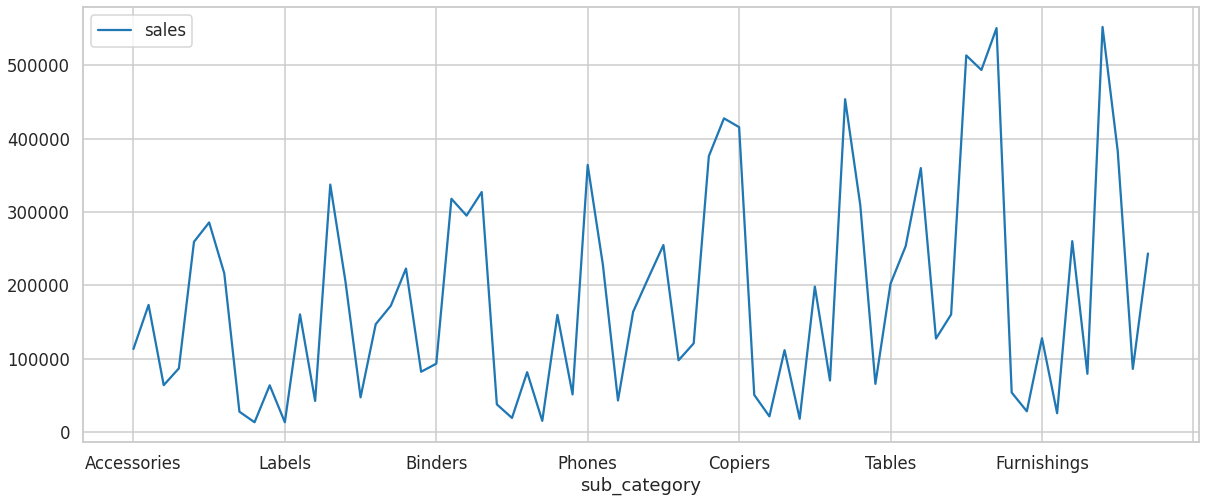

In [237]:
df_Sale_Sub.plot(kind='line',x='sub_category',y='sales',figsize = (20,8))

                  sales    profit
sub_category                     
Tables         757042.0  -64083.0
Fasteners       83242.0   11525.0
Labels          73404.0   15011.0
Supplies       243074.0   22583.0
Envelopes      170904.0   29601.0
Furnishings    385578.0   46967.0
Art            372092.0   57954.0
Machines       779060.0   58868.0
Paper          244292.0   59208.0
Binders        461912.0   72450.0
Storage       1127086.0  108461.0
Accessories    749237.0  129626.0
Appliances    1011064.0  141681.0
Chairs        1501682.0  141974.0
Bookcases     1466572.0  161924.0
Phones        1706824.0  216717.0
Copiers       1509436.0  258568.0


<AxesSubplot:xlabel='sub_category'>

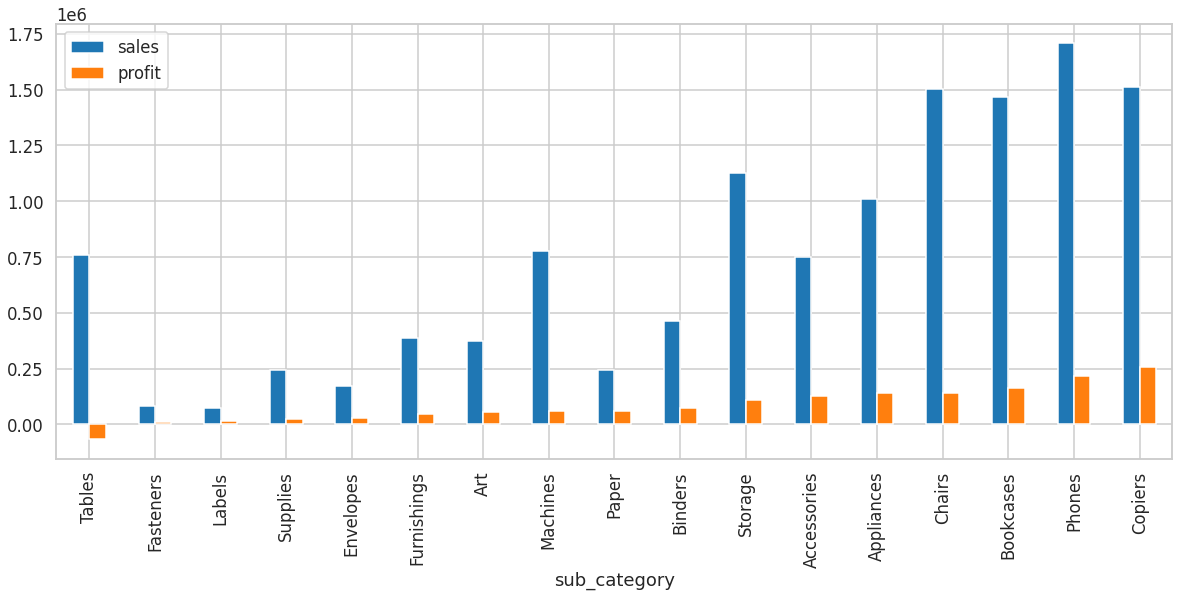

In [238]:
sub_grop = df.groupby('sub_category')[['sales', 'profit']].agg('sum').sort_values('profit')
print(sub_grop.agg('round'))
sub_grop.plot(kind='bar', figsize=(20, 8))

#we notice that copiers make the best profit while tables make loss

In [239]:
# Grouping products by Category and Sub-Category
cat_subcat = pd.DataFrame(df.groupby(['category', 'sub_category']).sum()['profit'])

# Sorting the values
cat_subcat.sort_values(['category','profit'], ascending=False)


profit
category        sub_category              
Technology      Copiers       258567.54818
                Phones        216717.00580
                Accessories   129626.30620
                Machines       58867.87300
Office Supplies Appliances    141680.58940
                Storage       108461.48980
                Binders        72449.84600
                Paper          59207.68270
                Art            57953.91090
                Envelopes      29601.11630
                Supplies       22583.26310
                Labels         15010.51200
                Fasteners      11525.42410
Furniture       Bookcases     161924.41950
                Chairs        141973.79750
                Furnishings    46967.42550
                Tables        -64083.38870

                    sales    profit
region                             
Canada            66928.0   17817.0
Southeast Asia   884423.0   17852.0
Caribbean        324281.0   34571.0
EMEA             806161.0   43898.0
Africa           783773.0   88872.0
East             678781.0   91523.0
West             725458.0  108418.0
Oceania         1100185.0  121667.0
Central Asia     752827.0  132480.0
South           1600907.0  140356.0
North Asia       848310.0  165578.0
North           1248166.0  194598.0
Central         2822303.0  311404.0


<AxesSubplot:xlabel='region'>

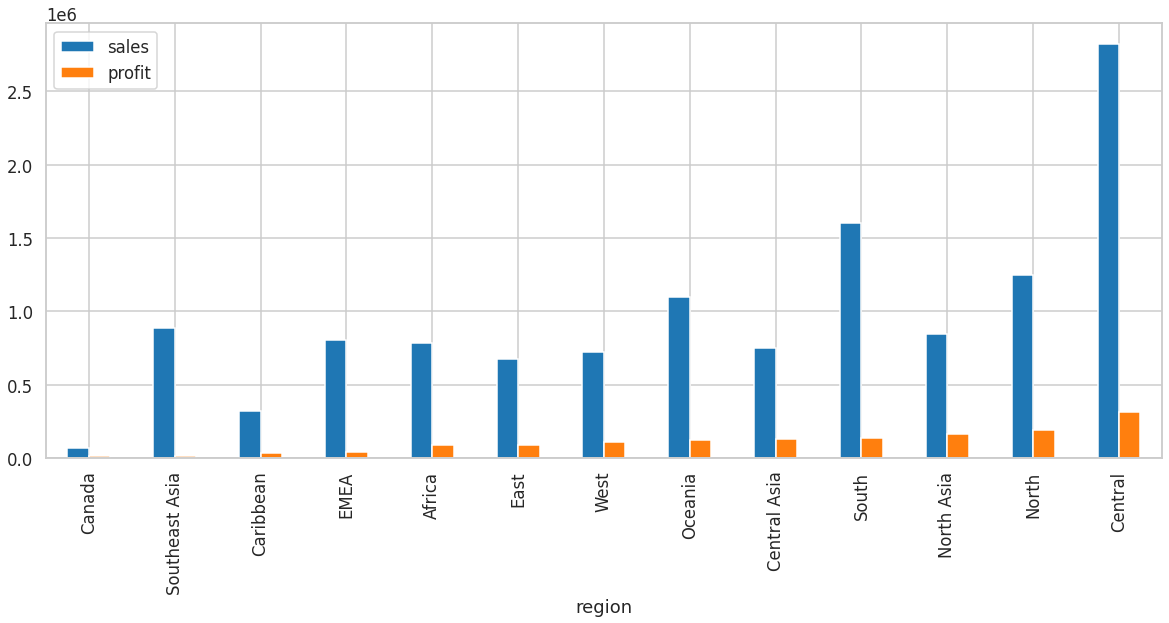

In [240]:
region_grop = df.groupby('region')[['sales', 'profit']].agg('sum').sort_values('profit')
print(region_grop.agg('round'))
region_grop.plot(kind='bar', figsize=(20, 8))

#we notice that Central make the best profit 

                    sales    profit
ship_mode                          
First Class     1830976.0  208105.0
Same Day         667202.0   76173.0
Second Class    2565672.0  294161.0
Standard Class  7578652.0  890596.0


<AxesSubplot:xlabel='ship_mode'>

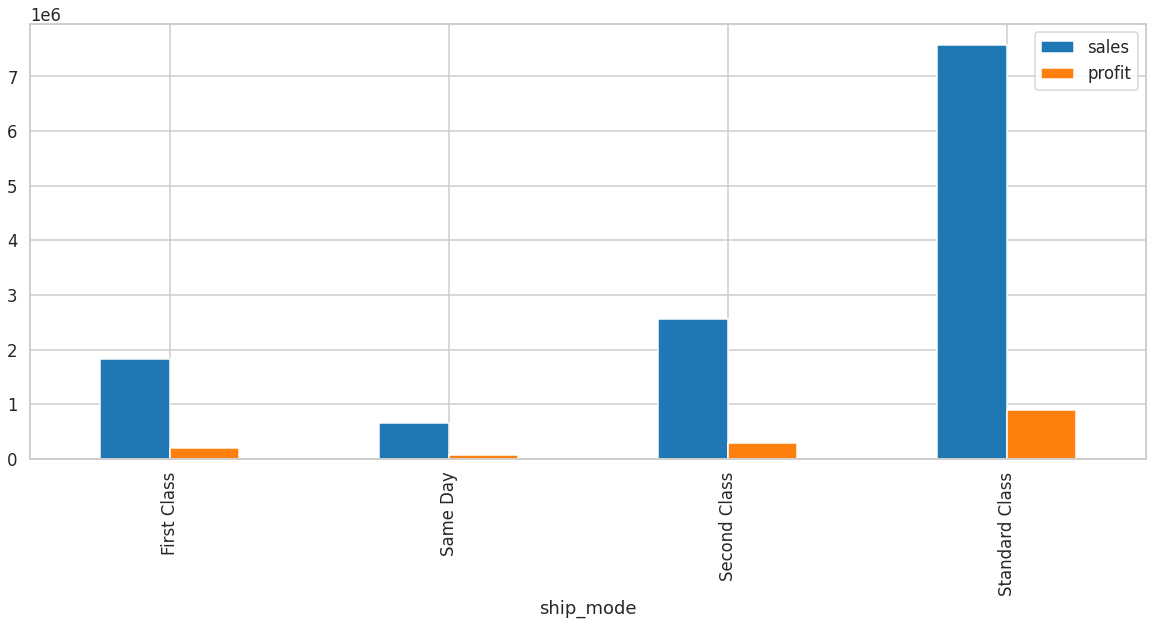

In [241]:
ship_mode_grop = df.groupby('ship_mode')[['sales', 'profit']].agg('sum')
print(ship_mode_grop.agg('round'))
ship_mode_grop.plot(kind='bar', figsize=(20, 8))

              shipping_cost
sub_category               
Labels               8060.0
Fasteners            9053.0
Envelopes           18547.0
Supplies            24812.0
Paper               26661.0
Furnishings         40747.0
Art                 41287.0
Binders             48182.0
Machines            79136.0
Tables              79861.0
Accessories         83513.0
Appliances         108301.0
Storage            120546.0
Bookcases          155482.0
Copiers            159496.0
Chairs             164229.0
Phones             184902.0


<AxesSubplot:xlabel='sub_category'>

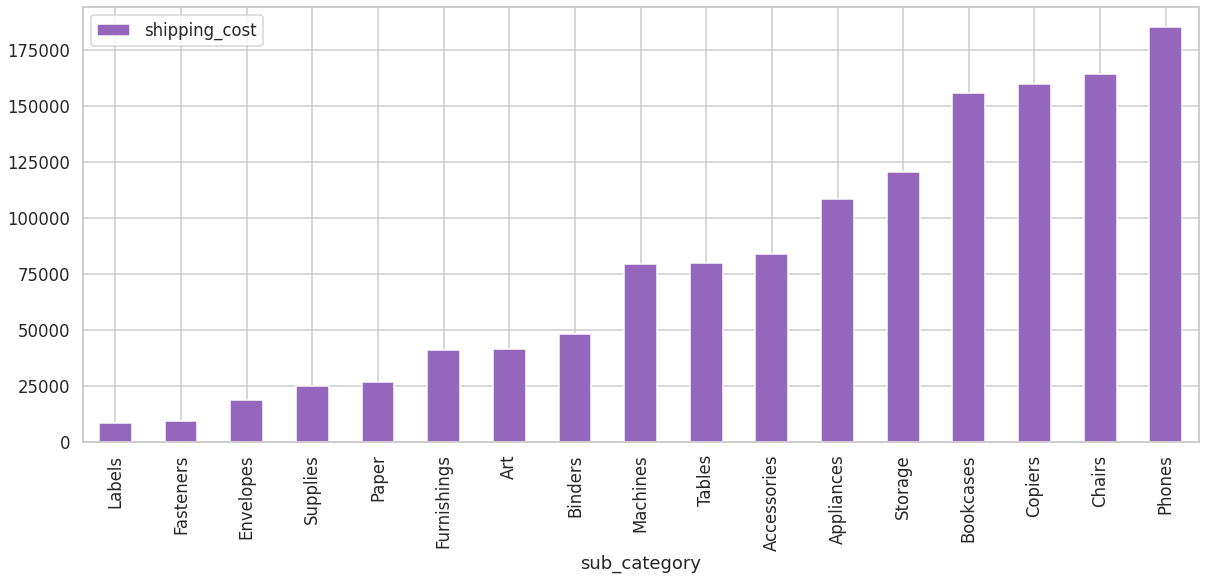

In [242]:
sub_grop = df.groupby('sub_category')[['shipping_cost']].agg('sum').sort_values('shipping_cost')
print(sub_grop.agg('round'))
sub_grop.plot(kind='bar',color='#9467bd',figsize=(20, 8))